In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
os.chdir('C:/Users/avinash/Downloads')
data=pd.read_csv('train_ctrUa4K.csv')
data['Loan_Status'].value_counts(normalize=True)
#np.corrcoef(data['Loan_Status'],data['Credit_History'])
#np.corrcoef(data['Loan_Status'],data['Credit_History'])
data['Gender'].value_counts()
data.head()
data.shape
#data.dtypes

(614, 13)

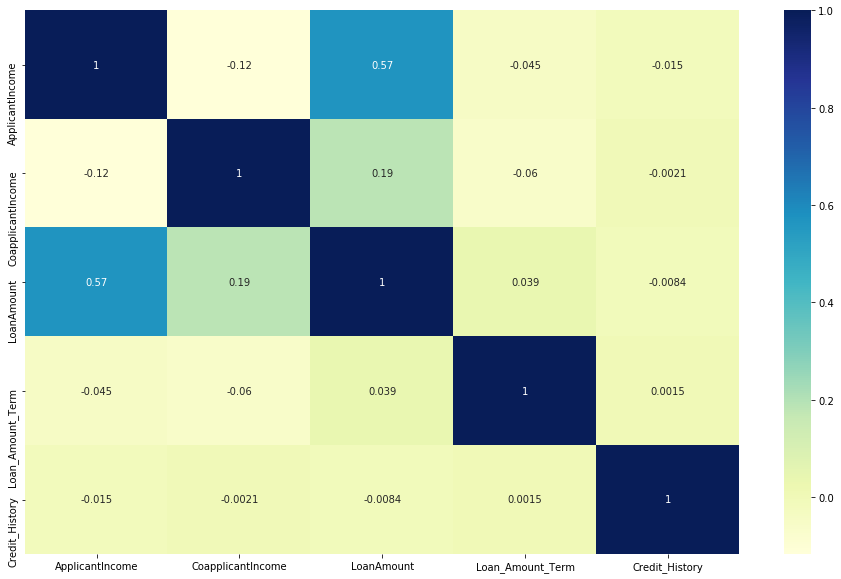

In [3]:
plt.figure(figsize=(16,10))

sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

In [4]:

data['Loan_Status']=data['Loan_Status'].map({"Y":1,"N":0})
y=data['Loan_Status']
data=data.drop(columns='Loan_Status')


In [5]:
na_df=pd.DataFrame({"Column_name":data.columns,
                     "Na_Count":data.isnull().sum(),
                     "Na_Percentage":data.isnull().sum()/data.shape[0]/100})
na_df
na_df.sort_values(by="Na_Percentage",ascending=False)

,Column_name,Na_Count,Na_Percentage
Credit_History,Credit_History,50,0.000814
Self_Employed,Self_Employed,32,0.000521
LoanAmount,LoanAmount,22,0.000358
Dependents,Dependents,15,0.000244
Loan_Amount_Term,Loan_Amount_Term,14,0.000228
Gender,Gender,13,0.000212
Married,Married,3,0.000049
Loan_ID,Loan_ID,0,0.000000
Education,Education,0,0.000000
ApplicantIncome,ApplicantIncome,0,0.000000


Single variable

In [6]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
dtype: int64

In [7]:
data['LoanAmount'].median()
data['LoanAmount'].mean()

146.41216216216216

In [8]:
data['LoanAmount'].fillna(128,inplace=True)
data['LoanAmount']
data.isnull().sum()
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,train_size=0.8,random_state=0)
x_train

C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
533,LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,1.0,Semiurban
452,LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural
355,LP002144,Female,No,0,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban
118,LP001421,Male,Yes,0,Graduate,No,5568,2142.0,175.0,360.0,1.0,Rural
144,LP001508,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural
366,LP002187,Male,No,0,Graduate,No,2500,0.0,96.0,480.0,1.0,Semiurban


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in x_train.columns:
    if x_train[col].dtype=='object':
        x_train[col]=label_encoder.fit_transform(x_train[col])
x_train.head()

C:\Users\avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,67,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1
533,426,1,0,1,0,0,11250,0.0,196.0,360.0,1.0,1
452,360,1,1,0,0,0,3948,1733.0,149.0,360.0,0.0,0
355,287,0,0,0,0,0,3813,0.0,116.0,180.0,1.0,2
266,210,1,1,2,0,0,4708,1387.0,150.0,360.0,1.0,1


In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1),copy=True)
x_train=min_max.fit_transform(x_train[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome']])
x_test=min_max.transform(x_test[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome']])

C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)


C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve

confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [14]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8292682926829268

In [15]:
precision=precision_score(y_test,y_pred)
precision


0.822429906542056

In [16]:
recall=recall_score(y_test,y_pred)
recall

0.9777777777777777

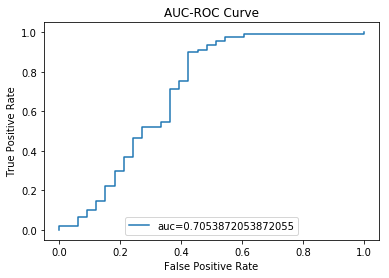

In [17]:
y_pred_proba=log_reg.predict_proba(x_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()


In [18]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
    

In [19]:
#def get_score(model,x_train,y_train,x_test,y_test):
   # model.fit(x_train,y_train)
  #  return model.score(x_test,y_test)

In [20]:
#for train_index,test_index in kf.split(data):
  #  x_train,x_test,y_train,y_test=data.index[train_index] ,data.index[test_index],
 #   data.traget[train_index],data.traget[test_index]

#print(get_score(LogisticRegression(),x_train,y_train,x_test,y_test))
                

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import GridSearchCV,RandomizedSearchCV
parmeter={"criterion":["entropy"],
          "max_depth":[5,6,7,8,9],
          "min_samples_split":[3,4,5,6,7],
          "min_samples_leaf":[1,2,3,4,5]}
tree=DecisionTreeClassifier(random_state=42)
tree

gd_cv=GridSearchCV(estimator=tree,param_grid=parmeter,cv=5)

gd_cv.fit(x_train,y_train)

gd_cv.best_params_

#gd_cv.best_score_




C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [22]:
rd_cv=RandomizedSearchCV(estimator=tree,param_distributions=parmeter,cv=5, n_iter=10)

rd_cv.fit(x_train,y_train)

rd_cv.best_params_

rd_cv.best_score_

C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7739307535641547

In [23]:
tree=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=7,min_samples_split=3,min_samples_leaf=3)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix


array([[14, 19],
       [ 5, 85]], dtype=int64)

In [25]:
recall=recall_score(y_test,y_pred)
recall


0.9444444444444444

In [26]:
prec=precision_score(y_test,y_pred)
prec

0.8173076923076923

In [27]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8048780487804879

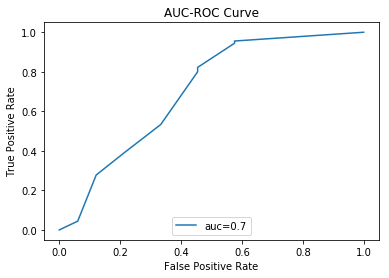

In [28]:
y_pred_proba_1=tree.predict_proba(x_test)[::,1]


fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba_1)

auc = roc_auc_score(y_test, y_pred_proba_1)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()


In [29]:
fpr,tpr,thresholds
y_pred_proba_1=tree.predict_proba(x_test)[::,1]
y_pred_proba_1

array([0.57142857, 0.81818182, 0.68085106, 0.82142857, 1.        ,
       0.        , 0.81818182, 0.68085106, 0.        , 0.95294118,
       0.57142857, 0.57142857, 0.68085106, 0.68085106, 0.57142857,
       0.57142857, 0.68085106, 0.95294118, 0.57142857, 0.        ,
       0.        , 0.95294118, 0.82142857, 0.68085106, 0.95294118,
       0.68085106, 0.68085106, 0.68085106, 0.        , 0.        ,
       0.68085106, 1.        , 0.95294118, 0.68085106, 0.82142857,
       0.        , 0.68085106, 0.95294118, 0.81818182, 0.81818182,
       0.57142857, 0.        , 0.66666667, 1.        , 0.57142857,
       0.68085106, 0.81818182, 0.81818182, 0.82142857, 0.82142857,
       0.57142857, 0.82142857, 0.95294118, 0.82142857, 0.        ,
       0.68085106, 0.95294118, 0.81818182, 0.68085106, 0.81818182,
       0.        , 0.68085106, 0.95294118, 0.        , 0.81818182,
       0.68085106, 0.68085106, 0.95294118, 0.68085106, 0.95294118,
       0.95294118, 0.81818182, 0.82142857, 0.81818182, 0.4    